In [6]:
install.packages("RSelenium")
library(RSelenium)
#citation("RSelenium")

The following package(s) will be installed:
- RSelenium [1.7.9]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing RSelenium ...                      OK [linked from cache]


In [21]:
install.packages("rvest")
install.packages("dplyr")
install.packages("readr")
install.packages("htmlwidgets")



The following package(s) will be installed:
- rvest [1.0.4]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing rvest ...                          OK [linked from cache]
The following package(s) will be installed:
- dplyr [1.1.4]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing dplyr ...                          OK [linked from cache]
The following package(s) will be installed:
- readr [2.1.5]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing readr ...                          OK [linked from cache]
The following package(s) will be installed:
- htmlwidgets [1.6.4

In [1]:
# Charger les bibliothèques nécessaires
library(rvest)
library(dplyr)
library(readr)
library(DT)
library(httr)

# URL de base pour la recherche de produits sur Amazon
base_url <- "https://www.amazon.com/s?i=specialty-aps&bbn=16225007011&rh=n%3A16225007011%2Cn%3A13896617011&page="

# Initialiser des vecteurs pour stocker les détails des produits
titles <- c()
prices <- c()
ratings <- c()
features <- list()

# Boucle à travers plusieurs pages ( les 3 premières pages)
for (page in 1:3) {
  # Construire l'URL pour la page courante
  main_url <- paste0(base_url, page)
  
    # Tenter de lire le contenu HTML de l'URL principale
  response <- GET(main_url, add_headers("User-Agent" = "Mozilla/5.0"))
  
 # Vérifier si la requête a réussi
  if (status_code(response) == 200) {
    main_page <- content(response, "text")
    
    # Analyser le contenu HTML
    main_page <- read_html(main_page)
    Sys.sleep(sample(5:10, 1))  # Random delay between 5 and 10 seconds
    
   # Extraire les URLs des pages de produits individuelles
    product_urls <- main_page %>%
      html_nodes("[class='a-link-normal s-no-outline']") %>%
      html_attr("href") %>%
      unique()
    
    # URL de base pour Amazon
    base_url_full <- "https://www.amazon.com"
    
    # Boucle à travers chaque URL de produit pour extraire les détails
    for (url in product_urls) {
      tryCatch({
        product_page_response <- GET(paste0(base_url_full, url), add_headers("User-Agent" = "Mozilla/5.0"))
        
        if (status_code(product_page_response) == 200) {
          product_page <- content(product_page_response, "text")
          product_page <- read_html(product_page)
          Sys.sleep(sample(5:10, 1))  # Délai aléatoire entre les requêtes
          
         # Extraire le titre du produit
          title <- product_page %>%
            html_node("#productTitle") %>%
            html_text() %>%
            trimws()
          
          # Extraire le prix du produit
          price <- product_page %>%
            html_node(".a-price .a-offscreen") %>%
            html_text() %>%
            trimws()
          
         # Extraire les évaluations du produit
          rating <- product_page %>%
            html_node(".a-icon-alt") %>%
            html_text() %>%
            trimws()
          
          # Extraire les caractéristiques et spécifications du produit
          feature <- product_page %>%
            html_nodes("#feature-bullets ul.a-unordered-list li") %>%
            html_text() %>%
            trimws()
          
         # Ajouter les détails aux vecteurs
          titles <- c(titles, title)
          prices <- c(prices, price)
          ratings <- c(ratings, rating)
          features <- append(features, list(feature))
        } else {
          message(paste("Failed to access product page:", url))
        }
        
      }, error = function(e) {
        message(paste("Error occurred while processing:", url))
        message(e)
      })
    }
    
  } else {
    message(paste("Error occurred while accessing:", main_url))
    message(paste("Status code:", status_code(response)))
  }
}

# Créer un dataframe avec les détails extraits
data <- data.frame(
  Title = titles,
  Price = prices,
  Ratings = ratings,
  Features = I(features),
  stringsAsFactors = FALSE
)

# Écrire les données dans un fichier CSV
write_csv(data, "my_products.csv")

# Afficher les données dans une datatable
datatable(data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘readr’


The following object is masked from ‘package:rvest’:

    guess_encoding




HTML widgets cannot be represented in plain text (need html)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'data.frame':	43 obs. of  4 variables:
 $ Title   : chr  "Samsung Galaxy Tab A9+ Tablet 11” 64GB Android Tablet, Big Screen, Quad Speakers, Upgraded Chipset, Multi Windo"| __truncated__ "SAMSUNG Galaxy Tab A9+ Plus Kids Edition 11” 64GB WiFi 7 Android AI Tablet, Long Battery Life, Expandable Stora"| __truncated__ "Samsung Galaxy Tab A9+ Plus 11” 64GB Android Tablet, Big Screen, Quad Speakers, Upgraded Chipset, Multi Window "| __truncated__ "SAMSUNG Galaxy Tab A9+ Plus Kids Edition 11” 64GB WiFi 7 Android AI Tablet, Long Battery Life, Expandable Stora"| __truncated__ ...
 $ Price   : chr  "$149.00" "$199.99" "$149.00" "$199.99" ...
 $ Ratings : chr  "4.5 out of 5 stars" "4.5 out of 5 stars" "4.5 out of 5 stars" "4.5 out of 5 stars" ...
 $ Features: chr  "c(\"BIG SCREEN. FAMILY-SIZED FUN: Bring fun home to everyone with a bright, engaging screen; great for videos, "| __truncated__ "c(\"FAMILY-SIZE SCREEN. KID-FRIENDLY FUN: A bright, engaging 11\\\" screen lets kids stream, learn and do w

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "Certaines valeurs de prix n'ont pas pu être converties."
[1] NA


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "Certaines valeurs de ratings sont manquantes ou mal formatées."


    Title               Price           Ratings      Features        
 Length:39          Min.   : 97.99   Min.   : NA   Length:39         
 Class :character   1st Qu.:164.43   1st Qu.: NA   Class :character  
 Mode  :character   Median :199.99   Median : NA   Mode  :character  
                    Mean   :230.69   Mean   :NaN                     
                    3rd Qu.:279.00   3rd Qu.: NA                     
                    Max.   :449.95   Max.   : NA                     
                                     NA's   :39                      

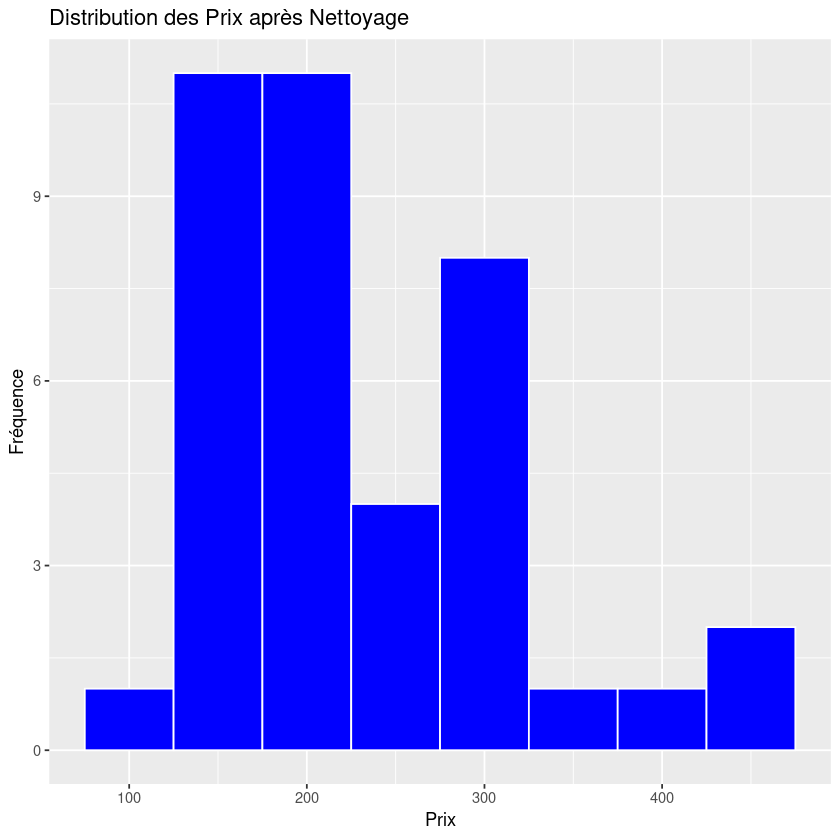

In [3]:
library(dplyr)
library(readr)
library(ggplot2)

# Charger les données
data <- read.csv("my_products.csv", stringsAsFactors = FALSE)

# Afficher la structure des données
str(data)

# 1. Nettoyage des valeurs manquantes
# Remplacer les valeurs manquantes dans 'Title' et 'Features' par "Non spécifié" (ou autre valeur pertinente)
data$Title[is.na(data$Title)] <- "Non spécifié"
data$Features[is.na(data$Features)] <- "Non spécifié"

# 2. Nettoyage de la colonne 'Price' : suppression du symbole $ et conversion en numérique
data$Price <- as.numeric(gsub("\\$", "", data$Price))

# Vérifier si la conversion a introduit des NAs dans 'Price'
if (any(is.na(data$Price))) {
  print("Certaines valeurs de prix n'ont pas pu être converties.")
  print(data[is.na(data$Price), "Price"])
}

# 3. Nettoyage de la colonne 'Ratings' : extraction du score numérique
data$Ratings <- as.numeric(gsub(" out of 5 stars", "", gsub(" ", "", data$Ratings)))

# Vérifier si la conversion a bien fonctionné
if (any(is.na(data$Ratings))) {
  print("Certaines valeurs de ratings sont manquantes ou mal formatées.")
}

# 4. Suppression des outliers dans 'Price' avec la méthode IQR
Q1 <- quantile(data$Price, 0.25, na.rm = TRUE)
Q3 <- quantile(data$Price, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

# Identifier les bornes inférieures et supérieures des outliers
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Filtrer les outliers
data_cleaned <- data %>% filter(Price >= lower_bound & Price <= upper_bound)

# 5. Imputation des valeurs manquantes restantes (si nécessaire)
# Si la colonne 'Ratings' ou 'Price' contient encore des NA, nous pouvons les remplacer par la moyenne
data_cleaned$Price[is.na(data_cleaned$Price)] <- mean(data_cleaned$Price, na.rm = TRUE)
data_cleaned$Ratings[is.na(data_cleaned$Ratings)] <- mean(data_cleaned$Ratings, na.rm = TRUE)

# 6. Afficher les statistiques résumées après nettoyage
summary(data_cleaned)

# 7. Visualisation des prix après nettoyage
ggplot(data_cleaned, aes(x = Price)) +
  geom_histogram(binwidth = 50, fill = "blue", color = "white") +
  labs(title = "Distribution des Prix après Nettoyage", x = "Prix", y = "Fréquence")

# 8. Enregistrer les données nettoyées
write.csv(data_cleaned, "cleaned_my_products.csv", row.names = FALSE)

In [5]:
library(dplyr)
library(stringr)

# Charger les données nettoyées
data_cleaned <- read.csv("cleaned_my_products.csv", stringsAsFactors = FALSE)

# Fonction pour générer une URL de recherche sur Amazon
generate_amazon_url <- function(title, features) {
  # Combine le titre et les fonctionnalités pour créer une requête de recherche
  search_query <- paste(title, features, sep = " ")
  
  # Remplacer les espaces par des "+" pour correspondre à l'URL de recherche Amazon
  search_query <- str_replace_all(search_query, " ", "+")
  
  # Créer l'URL de recherche Amazon
  url <- paste0("https://www.amazon.com/s?k=", search_query)
  
  return(url)
}

# Ajouter la colonne 'URL' en appliquant la fonction à chaque ligne
data_cleaned$URL <- mapply(generate_amazon_url, data_cleaned$Title, data_cleaned$Features)

# Vérifier le résultat
head(data_cleaned)

# Enregistrer les données avec la colonne URL ajoutée
write.csv(data_cleaned, "data_with_urls.csv", row.names = FALSE)

,Title,Price,Ratings,Features,URL
,<chr>,<dbl>,<lgl>,<chr>,<chr>
1,"Samsung Galaxy Tab A9+ Tablet 11” 64GB Android Tablet, Big Screen, Quad Speakers, Upgraded Chipset, Multi Window Display, Slim, Light, Durable Design, US Version, 2024, Graphite",149.00,NA,"c(""BIG SCREEN. FAMILY-SIZED FUN: Bring fun home to everyone with a bright, engaging screen; great for videos, games or fun time for the kids (11” 1920 x 1200, 90Hz, 480 nits, TFT LCD)"", ""RICH SOUND ALL AROUND: Your music; Your shows; Your games; Hear them all loud and clear, thanks to quad speakers powered by Dolby Atmos; Galaxy Tab A9+ delivers a cinema-like audio experience your ears will love"", ""POWER FOR ALL YOU DO. STORAGE FOR ALL YOU LOVE: Watch videos, play games and do more with an upgraded chipset; 4GB RAM + 64GB | 8GB RAM + 128GB | Up to 1TB expandable storage; Processor Qualcomm Snapdragon 69"", ""SEE and USE MULTIPLE APPS AT ONCE: Open multiple apps at once with Galaxy Tab A9+ and accomplish more seamlessly; Bounce between the things like a multitasking pro — browse the internet, check email and jot down notes all on one screen"", ""LOVED BY KIDS. TRUSTED BY PARENTS: Give your kids a safe place to learn and play with the Samsung Kids app⁵ ; Kids will love a wide variety of playful, colorful content that keeps them entertained while stimulating their young minds"", ""SLIM. LIGHT. DURABLE: Carry your Tab easily with a slim, light design that’s also durable; Galaxy Tab A9+ is the perfect blend of performance and portability to help you bring the fun with you wherever you go"", ""SEND FILES IN A FLASH: Sharing files has never been easier with Quick Share⁶ ; Select the file you want to share on your device —from a video clip to a photo, then easily transfer the file to another device whether it’s Android or iOS"", ""TAKE IT TO THE BIG SCREEN: With Smart View, experience videos exactly how you want; Looking to see more detail on a sports clip or cooking video you’re watching on your Tab Cast it to your Samsung TV and experience the thrills on your TV screen⁷"", ""KEEP THE CONVERSATION GOING: With Galaxy, it’s easy to stay connected to family and friends; Pick up a call or return a text from your Tab⁸ , even if your phone is in the next room"", ""For manufacturer contact information, please visit the official website, accessing the link in the \""Visit the SAMSUNG store\"" section, right under the item title"")","https://www.amazon.com/s?k=Samsung+Galaxy+Tab+A9++Tablet+11”+64GB+Android+Tablet,+Big+Screen,+Quad+Speakers,+Upgraded+Chipset,+Multi+Window+Display,+Slim,+Light,+Durable+Design,+US+Version,+2024,+Graphite+c(""BIG+SCREEN.+FAMILY-SIZED+FUN:+Bring+fun+home+to+everyone+with+a+bright,+engaging+screen;+great+for+videos,+games+or+fun+time+for+the+kids+(11”+1920+x+1200,+90Hz,+480+nits,+TFT+LCD)"",+""RICH+SOUND+ALL+AROUND:+Your+music;+Your+shows;+Your+games;+Hear+them+all+loud+and+clear,+thanks+to+quad+speakers+powered+by+Dolby+Atmos;+Galaxy+Tab+A9++delivers+a+cinema-like+audio+experience+your+ears+will+love"",+""POWER+FOR+ALL+YOU+DO.+STORAGE+FOR+ALL+YOU+LOVE:+Watch+videos,+play+games+and+do+more+with+an+upgraded+chipset;+4GB+RAM+++64GB+|+8GB+RAM+++128GB+|+Up+to+1TB+expandable+storage;+Processor+Qualcomm+Snapdragon+69"",+ ""SEE+and+USE+MULTIPLE+APPS+AT+ONCE:+Open+multiple+apps+at+once+with+Galaxy+Tab+A9++and+accomplish+more+seamlessly;+Bounce+between+the+things+like+a+multitasking+pro+—+browse+the+internet,+check+email+and+jot+down+notes+all+on+one+screen"",+""LOVED+BY+KIDS.+TRUSTED+BY+PARENTS:+Give+your+kids+a+safe+place+to+learn+and+play+with+the+Samsung+Kids+app⁵+;+Kids+will+love+a+wide+variety+of+playful,+colorful+content+that+keeps+them+entertained+while+stimulating+their+young+minds"",+""SLIM.+LIGHT.+DURABLE:+Carry+your+Tab+easily+with+a+slim,+light+design+that’s+also+durable;+Galaxy+Tab+A9++is+the+perfect+blend+of+performance+and+portability+to+help+you+bring+the+fun+with+you+wherever+you+go"",+ ""SEND+FILES+IN+A+FLASH:+Sharing+files+has+never+been+easier+w

[1] "Produit avec le prix le plus élevé:"
                                                                                                                                                                                                     Title
1 Samsung Galaxy Tab S9 FE 10.9” 256GB WiFi Android Tablet, Large Display, Long Battery Life, Powerful Processor, S Pen, 8MP Camera, Lightweight Durable Design, Expandable Storage,US Version 2023,Silver
   Price Ratings
1 449.95      NA
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

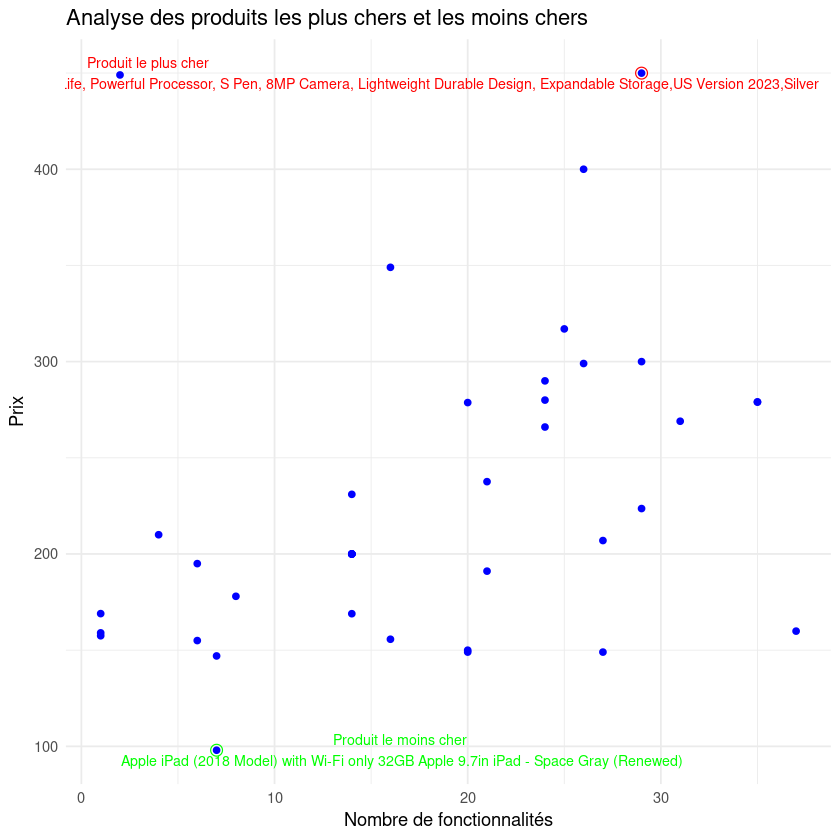

In [19]:
library(ggplot2)
library(dplyr)
library(ggrepel)  # Ajouter le package ggrepel pour éviter les chevauchements de texte

# Charger les données nettoyées
data_cleaned <- read.csv("cleaned_my_products.csv", stringsAsFactors = FALSE)

# Ajouter la colonne 'Feature_count' en comptant le nombre de fonctionnalités pour chaque produit
data_cleaned$Feature_count <- sapply(data_cleaned$Features, function(x) length(strsplit(x, ",")[[1]]))

# Produit avec le prix le plus élevé
most_expensive_product <- data_cleaned %>% 
  filter(Price == max(Price, na.rm = TRUE))

# Produit avec le prix le plus bas
cheapest_product <- data_cleaned %>% 
  filter(Price == min(Price, na.rm = TRUE))

# Afficher les produits les plus chers et les moins chers
print("Produit avec le prix le plus élevé:")
print(most_expensive_product)

print("Produit avec le prix le plus bas:")
print(cheapest_product)

# Créer un graphique pour visualiser les produits les plus chers et les moins chers
p <- ggplot(data_cleaned, aes(x = Feature_count, y = Price)) +
  geom_point(color = "blue") +  # Scatter plot standard
  
  # Ajouter le produit le plus cher en rouge
  geom_point(data = most_expensive_product, aes(x = Feature_count, y = Price), 
             color = "red", size = 3, shape = 1) +  
  
  # Ajouter le produit le moins cher en vert
  geom_point(data = cheapest_product, aes(x = Feature_count, y = Price), 
             color = "green", size = 3, shape = 1) +  
  
  # Ajouter des labels pour le produit le plus cher et le moins cher
  geom_text_repel(data = most_expensive_product, aes(x = Feature_count, y = Price, 
                                                     label = paste("Produit le plus cher\n", Title)),
                  color = "red", size = 3, box.padding = 0.5, max.overlaps = 10) +  # Ajouter les labels pour le produit le plus cher
  
  geom_text_repel(data = cheapest_product, aes(x = Feature_count, y = Price, 
                                              label = paste("Produit le moins cher\n", Title)),
                  color = "green", size = 3, box.padding = 0.5, max.overlaps = 10) +  # Ajouter les labels pour le produit le moins cher
  
  labs(title = "Analyse des produits les plus chers et les moins chers", 
       x = "Nombre de fonctionnalités", 
       y = "Prix") +
  theme_minimal()

# Afficher le graphique
print(p)


In [25]:
library(ggplot2)
library(plotly)
library(dplyr)

# Charger les données nettoyées
data_cleaned <- read.csv("cleaned_my_products.csv", stringsAsFactors = FALSE)

# Ajouter la colonne 'Feature_count' en comptant le nombre de fonctionnalités pour chaque produit
data_cleaned$Feature_count <- sapply(data_cleaned$Features, function(x) length(strsplit(x, ",")[[1]]))

# Filtrer les produits avec un prix bas (par exemple, prix inférieur ou égal à 200)
price_threshold <- 200
products_with_low_price <- data_cleaned %>%
  filter(Price <= price_threshold)

# Identifier le produit avec le plus grand nombre de fonctionnalités parmi ceux avec un prix bas
product_with_max_features <- products_with_low_price %>% 
  filter(Feature_count == max(Feature_count, na.rm = TRUE))

# Ajouter une colonne pour le texte à afficher (par exemple, le nom du produit et le lien)
product_with_max_features$Label <- "Produit"
product_with_max_features$URL <- paste0("https://www.amazon.com", product_with_max_features$Product_URL)  # Ajouter l'URL du produit spécifique

# Créer le graphique avec ggplot
p <- ggplot(data_cleaned, aes(x = Feature_count, y = Price, text = paste("Titre: ", Title, "<br>Prix: ", Price, "<br>Note: ", Ratings, "<br>Fonctionnalités: ", Features))) +
  geom_point(color = "blue") +  # Scatter plot standard
  geom_point(data = product_with_max_features, aes(x = Feature_count, y = Price), 
             color = "red", size = 3, shape = 1) +  # Entourer le produit en rouge
  geom_text(data = product_with_max_features, aes(x = Feature_count, y = Price, label = Label), 
            color = "red", vjust = -1, size = 6, fontface = "bold") +  # Ajouter du texte en rouge et plus grand
  labs(title = "Produit avec le plus de fonctionnalités à prix bas", x = "Nombre de fonctionnalités", y = "Prix") +
  theme_minimal()

# Convertir ggplot en graphique interactif avec plotly
p_interactive <- ggplotly(p, tooltip = "text")

# Ajouter un lien hypertexte cliquable sur le texte du produit
p_interactive <- p_interactive %>% 
  add_annotations(
    x = product_with_max_features$Feature_count, 
    y = product_with_max_features$Price, 
    text = paste('<a href="', product_with_max_features$URL, '" target="_blank">Produit</a>', sep = ""),  # Le texte visible sous forme de lien HTML
    showarrow = TRUE, 
    arrowhead = 2,
    font = list(color = "red", size = 18),  # Le texte "Produit" sera en rouge et de taille 18
    ax = 20, ay = -30,
    valign = "middle",
    align = "center"
  )

# Fonction pour afficher la ligne correspondante dans le dataset lors du clic
display_product_info <- function(event_data) {
  # Extraire l'indice du produit cliqué
  clicked_index <- event_data$pointNumber + 1  # Plotly indexe à partir de 0
  
  # Sélectionner les informations du produit
  product <- data_cleaned[clicked_index, ]
  
  # Afficher la ligne correspondante dans le dataset dans la console
  cat("\nInformations du produit sélectionné :\n")
  print(product)
}

# Convertir le graphique interactif avec plotly et capturer les clics
p_interactive <- p_interactive %>%
  onRender("
    function(el, x) {
      el.on('plotly_click', function(eventData) {
        // Appeler la fonction pour afficher les informations dans la console
        Shiny.setInputValue('clicked_product', eventData);
      });
    }")

# Observer le clic et afficher les informations dans la console
observe({
  event_data <- input$clicked_product
  if (!is.null(event_data)) {
    display_product_info(event_data)
  }
})

# Afficher le graphique interactif
p_interactive


HTML widgets cannot be represented in plain text (need html)

Après avoir analysé ce graphique, voici une découverte importante : Le produit avec le plus grand nombre de fonctionnalités à un prix bas (inférieur à 200 USD) est le "Acer Gateway Chromebook 311 CBO311-1H-C1MX". Ce modèle se distingue par un excellent rapport qualité/prix pour ceux qui recherchent un ordinateur portable avec de bonnes caractéristiques sans avoir à dépenser une fortune.

Détails du produit : Titre du produit : Acer Gateway Chromebook 311 CBO311-1H-C1MX Laptop Processeur : Intel Celeron N4500 Écran : 11.6" HD (1366 x 768) Display Mémoire : 4GB LPDDR4X Stockage : 64GB eMMC Wi-Fi : Wi-Fi 5 802.11ac Système d'exploitation : Chrome OS Couleur : Star Black Ce produit est particulièrement intéressant pour les utilisateurs à la recherche d'un ordinateur portable fonctionnel à un prix abordable. Malgré un prix inférieur à 200 USD, il offre un processeur décent, un bon affichage, et un stockage suffisant pour des tâches quotidiennes comme la navigation sur Internet, la rédaction de documents, et les applications basiques.